<a href="https://colab.research.google.com/github/akibae7/Task0-Titanic-Exploration/blob/main/task0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
#Download the dataset and load it using Pandas.
from google.colab  import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/DAC/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
#Remove all the NULL values from the dataset.
df_cleaned = df.dropna(how='any',axis=0)
df_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [7]:
# Remove 'Name' and 'PassengerID' column
df_cleaned.drop(['PassengerId', 'Name'], axis=1, inplace=True)
df_cleaned

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,11751,52.5542,D35,S
872,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,1,female,56.0,0,1,11767,83.1583,C50,C
887,1,1,female,19.0,0,0,112053,30.0000,B42,S


In [12]:
#Divide the dataset in 80:20 ratio using .loc and .iloc ONLY

# Print the 80% of the dataframe 
part_80 = df_cleaned.sample(frac = 0.8)
print("\n 80%  DataFrame:")
print(part_80)

# Print the 20% of the dataframe 
part_20 = df_cleaned.drop(part_80.index)
print("\n 20% DataFrame:")
print(part_20)


 80%  DataFrame:
     Survived  Pclass     Sex   Age  ...    Ticket      Fare    Cabin  Embarked
297         0       1  female   2.0  ...    113781  151.5500  C22 C26         S
215         1       1  female  31.0  ...     35273  113.2750      D36         C
867         0       1    male  31.0  ...  PC 17590   50.4958      A24         S
412         1       1  female  33.0  ...     19928   90.0000      C78         Q
251         0       3  female  29.0  ...    347054   10.4625       G6         S
..        ...     ...     ...   ...  ...       ...       ...      ...       ...
820         1       1  female  52.0  ...     12749   93.5000      B69         S
583         0       1    male  36.0  ...     13049   40.1250      A10         C
599         1       1    male  49.0  ...  PC 17485   56.9292      A20         C
356         1       1  female  22.0  ...    113505   55.0000      E33         S
75          0       3    male  25.0  ...    348123    7.6500    F G73         S

[146 rows x 10 column

(array([10.,  6., 32., 30., 40., 24., 23., 13.,  4.,  1.]),
 array([ 0.92 ,  8.828, 16.736, 24.644, 32.552, 40.46 , 48.368, 56.276,
        64.184, 72.092, 80.   ]),
 <a list of 10 Patch objects>)

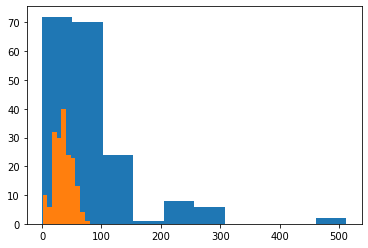

In [26]:
#Plot a histogram for 'Fare','Age' column
import matplotlib.pyplot as plt

plt.hist(df_cleaned['Fare'],bins=10)
plt.hist(df_cleaned['Age'],bins=10)

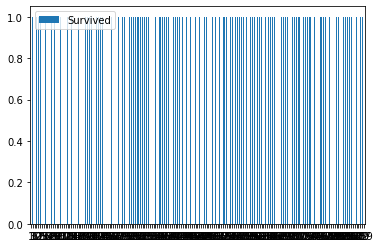

In [34]:
#Plot bar chart for all binary columns (like 'Survived')
df_cleaned.plot.bar(y='Survived', rot=0)
